# Face Recognition using LBPH

### LBPH (Local Binary Pattern Histogram) is a Face-Recognition algorithm it is used to recognize the face of a person. It is known for its performance and how it is able to recognize the face of a person from both front face and side face.
### Local Binary Pattern (LBP) is a simple yet very efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number.

In [2]:
#Importing Libraries
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
#Connecting to Google drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [5]:
#Unzip the file
import zipfile
path = '/content/drive/MyDrive/Computer Vision/Computer Vision Masterclass/Datasets/jones_gabriel.zip'
zib_object = zipfile.ZipFile(file = path, mode = 'r')
zib_object.extractall('./')
zib_object.close()

In [15]:
#Pre-processing the images
import os
def get_image_data():
  paths = [os.path.join('/content/jones_gabriel', f) for f in os.listdir('/content/jones_gabriel')]
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(path.split('.')[1])
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

In [16]:
ids, faces = get_image_data()

In [17]:
ids

array([2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 1])

In [18]:
faces

[array([[ 23,  23,  23, ..., 145, 148, 150],
        [ 23,  23,  23, ..., 147, 149, 149],
        [ 23,  24,  24, ..., 149, 151, 150],
        ...,
        [115, 116, 118, ..., 144, 145, 146],
        [115, 115, 117, ..., 144, 145, 145],
        [116, 114, 115, ..., 143, 144, 144]], dtype=uint8),
 array([[ 44,  43,  42, ...,  30,  31,  32],
        [ 44,  42,  41, ...,  28,  30,  31],
        [ 45,  42,  41, ...,  27,  29,  30],
        ...,
        [  9,   9,   9, ..., 121,  99,  97],
        [  9,  10,   9, ..., 108,  90,  94],
        [ 10,  10,   9, ...,  98,  83,  92]], dtype=uint8),
 array([[ 22,  20,  18, ..., 150, 151, 152],
        [ 21,  20,  19, ..., 151, 151, 151],
        [ 22,  22,  22, ..., 152, 152, 151],
        ...,
        [116, 117, 117, ..., 144, 144, 144],
        [116, 117, 119, ..., 144, 144, 144],
        [115, 117, 120, ..., 144, 144, 145]], dtype=uint8),
 array([[ 24,  21,  21, ...,  61,  71,  84],
        [ 25,  22,  22, ...,  60,  71,  84],
        [ 26,  2

In [19]:
#Training the LBPH Classifier
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [20]:
#Recognizing Faces
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [22]:
#Dimension of Image
image = Image.open('/content/jones_gabriel/person.2.21.jpg')
image.size

(220, 220)

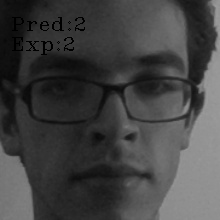

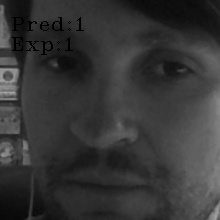

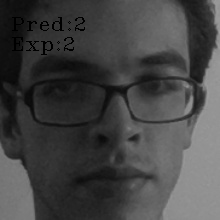

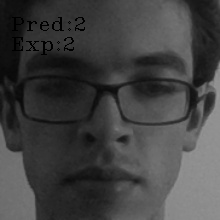

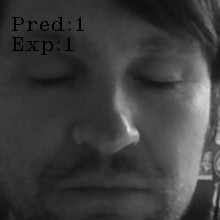

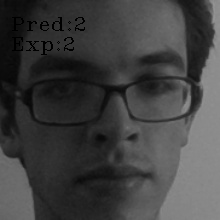

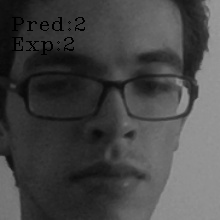

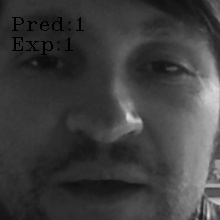

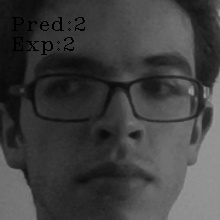

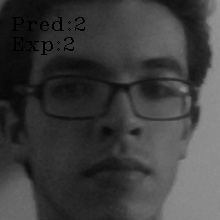

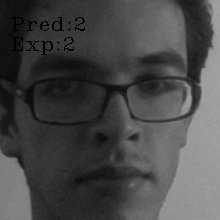

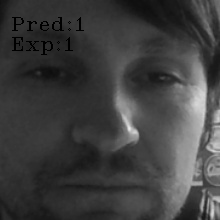

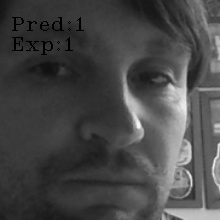

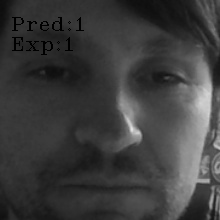

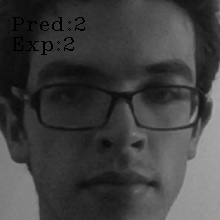

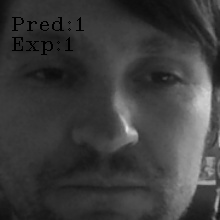

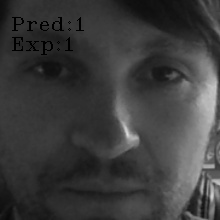

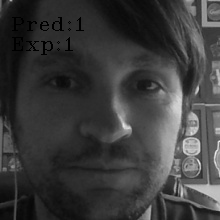

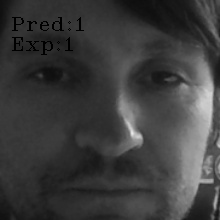

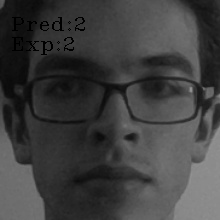

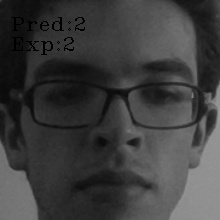

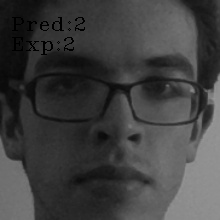

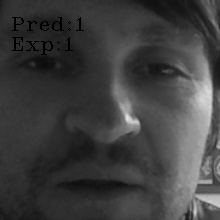

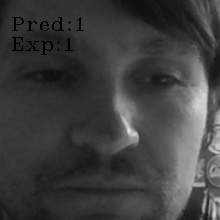

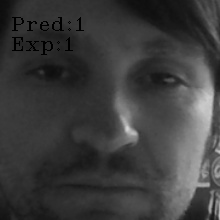

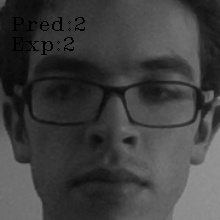

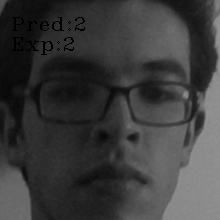

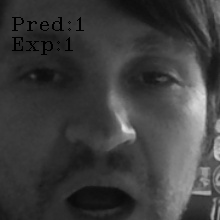

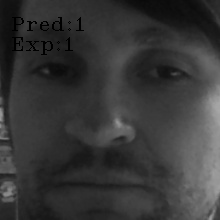

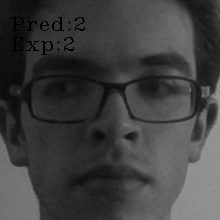

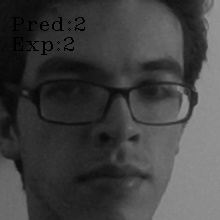

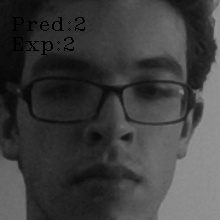

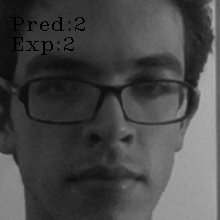

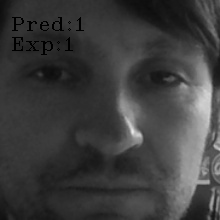

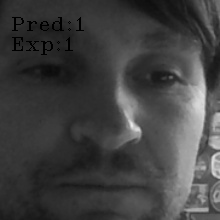

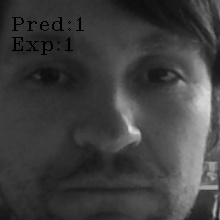

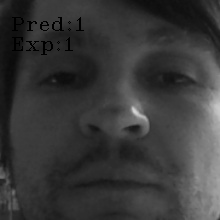

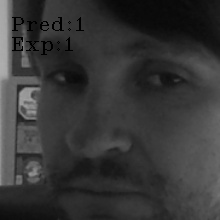

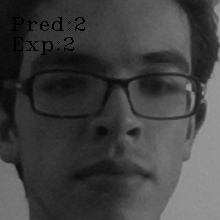

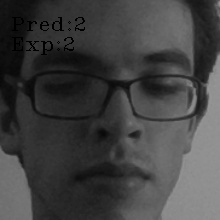

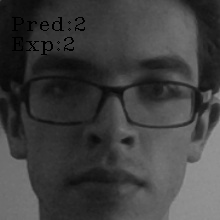

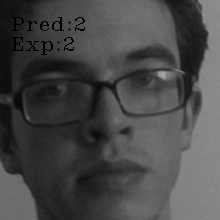

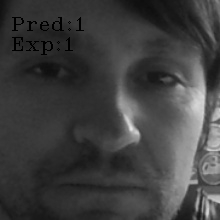

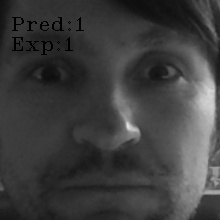

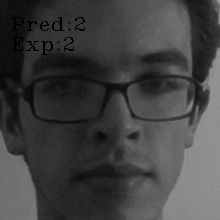

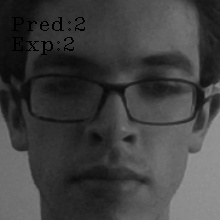

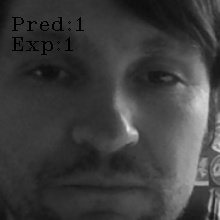

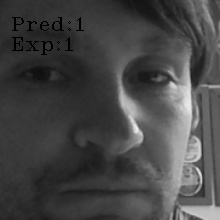

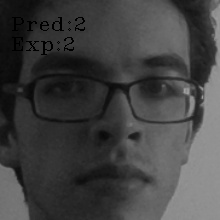

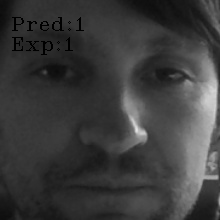

In [28]:
#Evaluating the Face Classifier
paths = [os.path.join('/content/jones_gabriel', f) for f in os.listdir('/content/jones_gabriel')]
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction,_ = lbph_face_classifier.predict(image_np)
  expected_output = int(path.split('.')[1])

  cv2.putText(image_np, 'Pred:' +str(prediction), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2.putText(image_np, 'Exp:' +str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2_imshow(image_np)